# Física Computacional 2

## Lista 1 - Transformadas de Fourier


### Questão 1 

In [45]:
 
from numpy import loadtxt,array,arange,argmax
from cmath import sin,pi,exp
from pylab import linspace
import matplotlib.pyplot as plt


Para reproduzir a onda quadrada vamos usar a função signal da biblioteca scipy

In [23]:
from scipy import signal

In [33]:
N = 1000
t = linspace(0, 1, N)
wave = 2*signal.square(2*pi*t)
#a função signal square cria a onda quadrada de amplitude 1.0. o parâmetro 2*pi*t é o padrão para criar um ciclo.


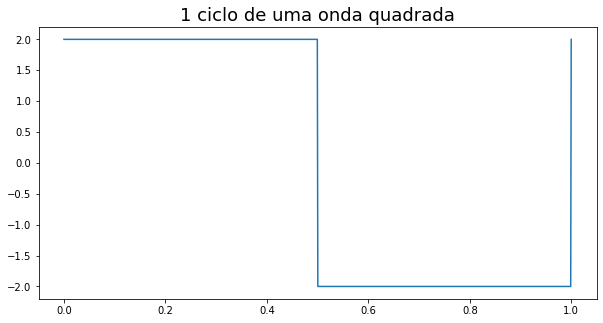

In [25]:
fig = plt.figure(figsize=(10,5))
plt.plot(t,wave)
#plt.xlabel("Teff",fontsize = 16)
#plt.ylabel("Mag",fontsize = 16)
plt.title("1 ciclo de uma onda quadrada",fontsize=18)
plt.show()



Agora vamos calcular as transformadas discretas de Fourier.Faremos isso calculando os coeficientes de Fourier e plotando o gráfico das amplitudes desses coeficientes, para assim conhecer as principais frequências que compõem o sinal periódico que queremos analisar. esses coeficientes podem ser calculados por: 

## $$c_k =  \sum_{n = 0}^{N-1} y_n exp(\frac{\mathrm{-2i \pi kn} }{\mathrm{N}})$$

## $$ \gamma _k =  \frac{\mathrm{c_k} }{\mathrm{N}} $$
    

In [27]:
#calculando a transformada discreta de fourier para a onda quadrada:
gammak1 = []

for k in range(N):
    s = 0
    for n in range(N):
        yn = wave[n]    
        s += yn*exp(-1j*2*pi*k*n/N)
    gammak1.append(s)
γ1 = array(gammak1)
γ1 = γ1/N

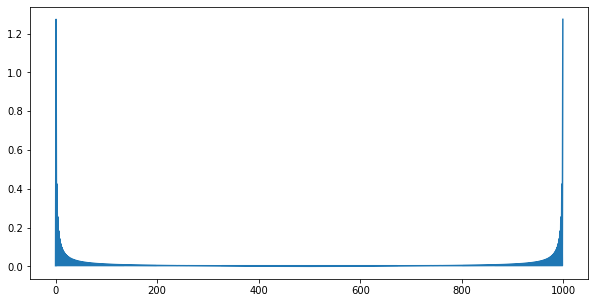

In [28]:
fig = plt.figure(figsize=(10,5))
plt.plot(abs(γ1))
plt.show()


Trabalhando agora com a  onda modulada senoidal yn = sin(πn/N) sin(10πn/N)

In [29]:
gammak2 = []
Yn = []
for k in range(N):
    s = 0
    for n in range(N):
        yn = sin(pi*n/N)*sin(pi*n*10/N)    
        if k == 0:
            Yn.append(yn)
        s += yn*exp(-1j*2*pi*k*n/N)
    gammak2.append(s)
γ2 = array(gammak2)
γ2 = γ2/N

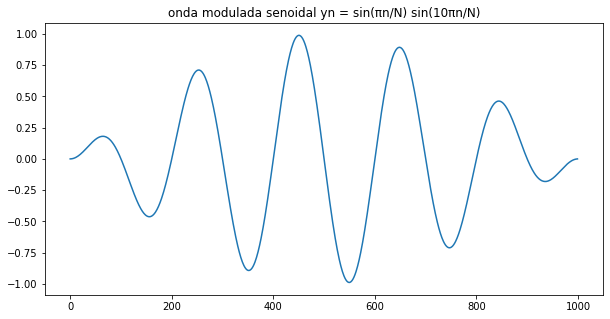

In [30]:
YN = array(Yn)
fig = plt.figure(figsize=(10,5))
plt.plot(YN)
plt.title("onda modulada senoidal yn = sin(πn/N) sin(10πn/N)",fontsize=12)
plt.show()


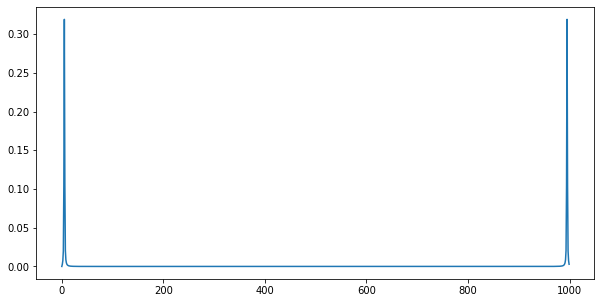

In [32]:
fig = plt.figure(figsize=(10,5))
plt.plot(abs(γ2))

### Questão 2

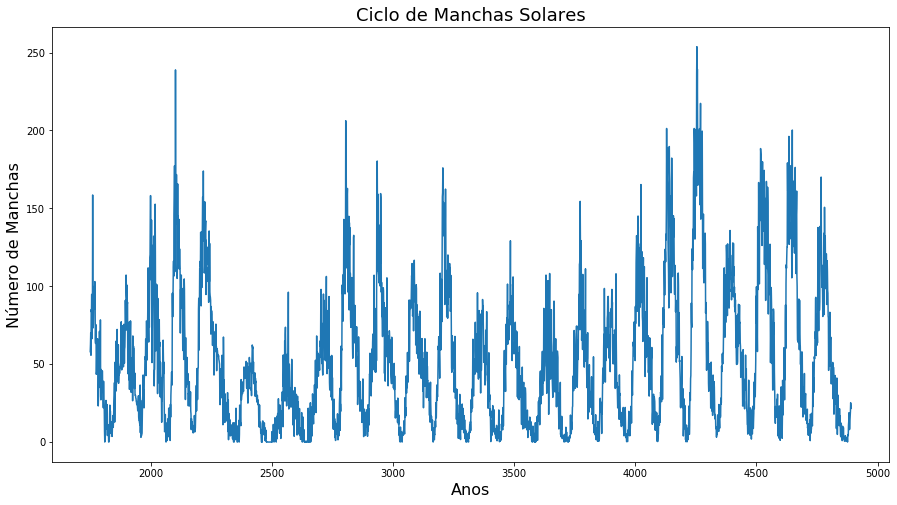

In [39]:
sinal =loadtxt("sunspots1.txt",float)
Nm = sinal[:,1]
N = len(Nm)
ano = arange(1749,1749+N)

fig = plt.figure(figsize=(15,8))
plt.plot(ano,Nm)
plt.title("Ciclo de Manchas Solares",fontsize=18)
plt.xlabel("Anos",fontsize = 16)
plt.ylabel("Número de Manchas",fontsize = 16)
plt.show()

N = len(Nm)

Podemos ver que há cerca de 4 vales entre cada 500 meses, portanto o período aparenta ser por volta de 500/4 = 125 meses. Vamos agora verificar esse resultado fazendo a transformada de Fourier desse sinal periódico:

In [50]:
ck = []

for k in range(N):
    s = 0
    for n in range(N):
        yn = Nm[n]
        s += yn*exp(-1j*2*pi*k*n/N)
    ck.append(s)

γ = array(ck)
γ = γ/N
#ck2 será o vetor que guarda os quadrados dos coeficientes para plotar o espectro de potencias;
ck2 = []
for i in range(N):
    ck2.append(abs(ck[i]*ck[i]))
CK2 = array(ck2)


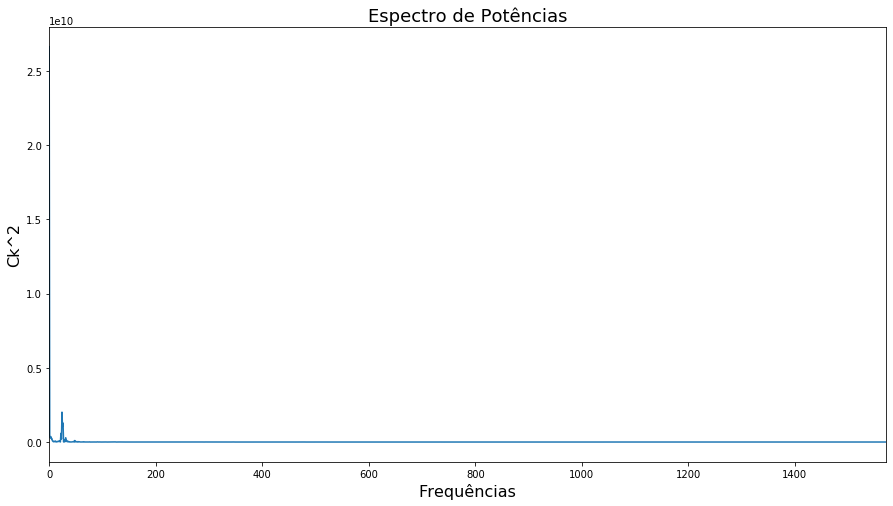

In [51]:
fig = plt.figure(figsize=(15,8))
plt.plot(CK2)
plt.title("Espectro de Potências",fontsize=18)
plt.xlabel("Frequências",fontsize = 16)
plt.ylabel("Ck^2",fontsize = 16)
plt.xlim(0,N/2)
plt.show()

vemos claramente uma frequência que se destaca bastante. Vamos analisar mais de perto, e , para garantir, pegaremos o arguento o qual dá o valor máximo dentro do vetor desses coeficientes:

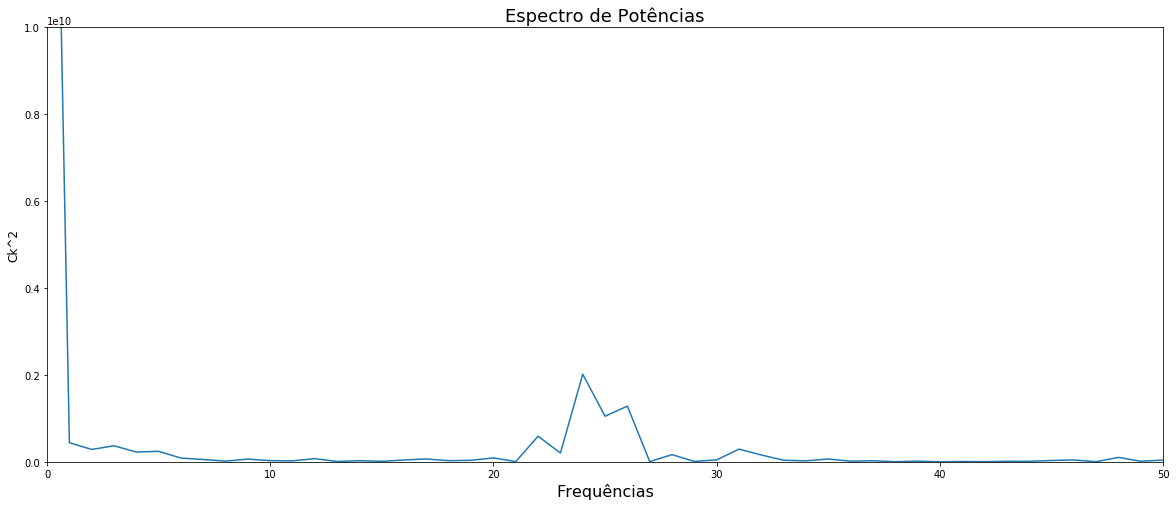

In [55]:
fig = plt.figure(figsize=(20,8))
plt.plot(CK2)
plt.title("Espectro de Potências",fontsize=18)
plt.xlabel("Frequências",fontsize = 16)
plt.ylabel("Ck^2",fontsize = 12)
plt.xlim(0,50)
plt.ylim(0,1e10)
plt.show()

In [56]:
x = argmax(abs(CK2[1:50]))
print(x)
T = N/x
print("o período principal do sinal é" ,T,"meses")

23
o período principal do sinal é 136.65217391304347 meses


### Questão 3

Nessa questão vamos usar a função da biblioteca numpy.fft para transformada rápida de Fourier: 

In [60]:
from numpy.fft import rfft

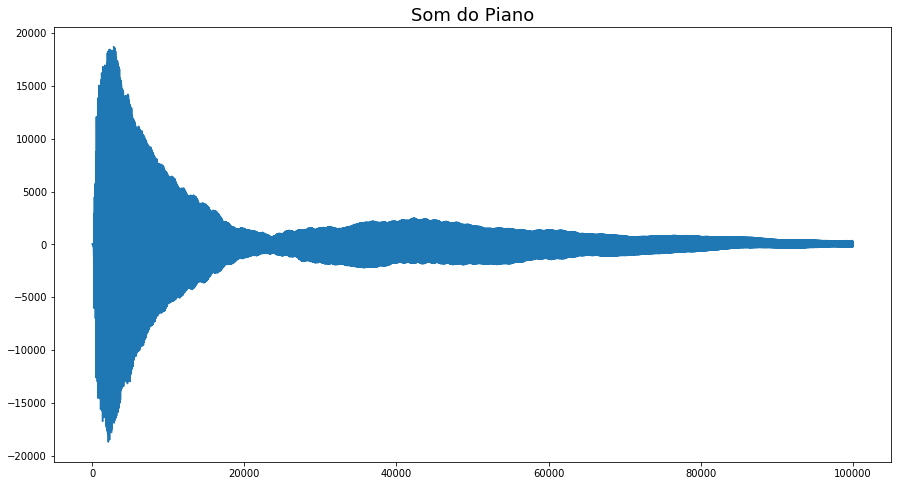

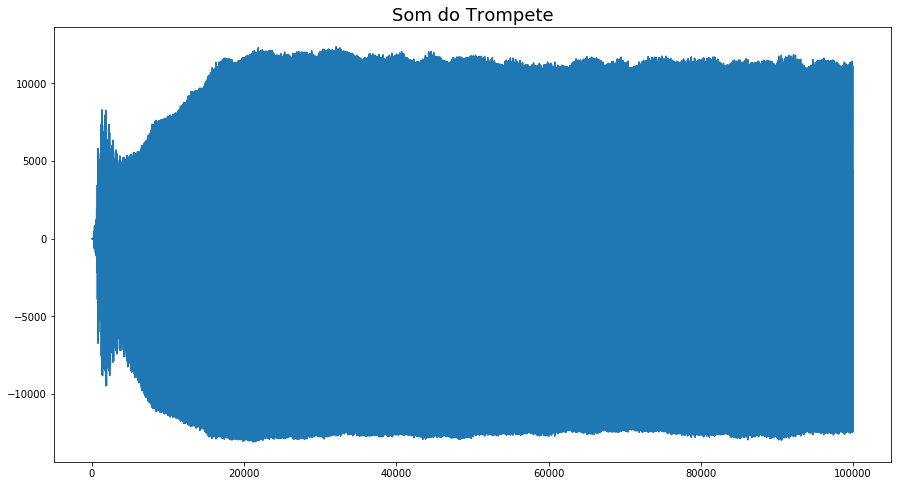

In [61]:
#importar os arquivos piano.txt e trumpet.txt

P = loadtxt("piano.txt",float)
Tr = loadtxt("trumpet.txt",float)

fig = plt.figure(figsize=(15,8))
plt.plot(P)
plt.title("Som do Piano",fontsize=18)
plt.show()

fig = plt.figure(figsize=(15,8))
plt.plot(Tr)
plt.title("Som do Trompete",fontsize=18)
plt.show()

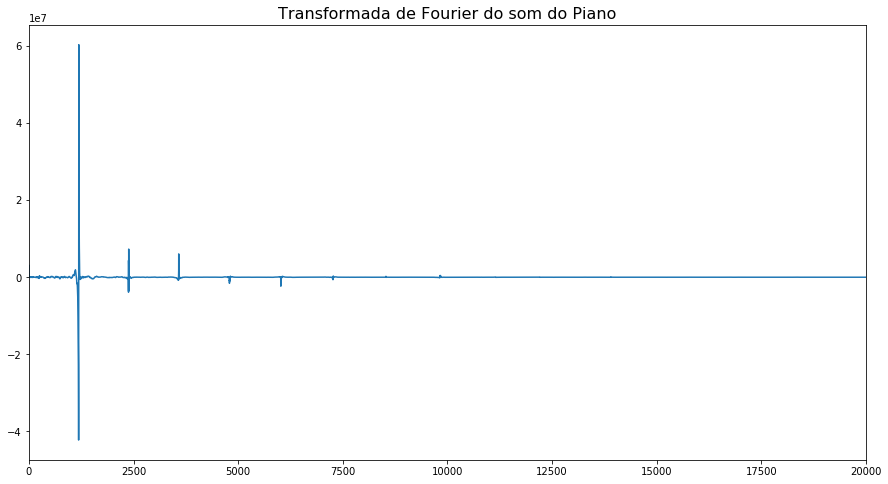

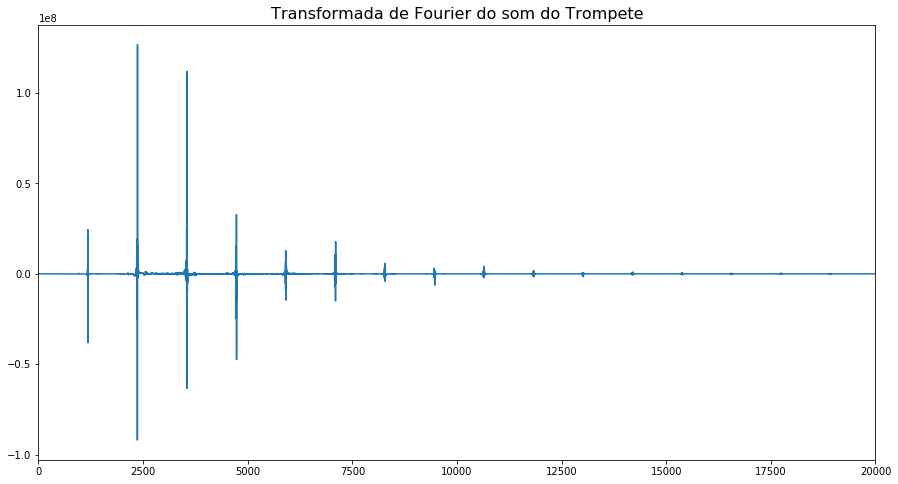

In [64]:
#calcular as transformadas de Fourier de cada sinal respectivamente:

ckP = rfft(P)
ckTr = rfft(Tr)

fig = plt.figure(figsize=(15,8))
plt.plot(ckP)
plt.title("Transformada de Fourier do som do Piano",fontsize=16)
plt.xlim(0,20000)
plt.show()

fig = plt.figure(figsize=(15,8))
plt.plot(ckTr)
plt.title("Transformada de Fourier do som do Trompete",fontsize=16)
plt.xlim(0,20000)
plt.show()


#### Analisando os 2 sons, percebemos que o Piano tem um timbre mais cru, enquanto o Trompete, que é um instrumento de sopro, Tem um som com muito mais harmônicos (frequências secundárias que seguem o padrão matemático da Série Harmônica) que compõem sua onda sonora. 

In [73]:
xP = argmax(abs(ckP[1:20000]))

print("a frequência principal na composição dessa onda sonora é" ,xP,"Hz")

xTr = argmax(abs(ckTr[1:20000]))

print("a frequência principal na composição dessa onda sonora é" ,xTr,"Hz")


a frequência principal na composição dessa onda sonora é 1189 Hz
a frequência principal na composição dessa onda sonora é 2366 Hz


as frequências das notas musicais são dadas pelos termos de uma progressão geométrica de razão q = 2^(1/12). A partir disso, temos por exemplo a frequência de referência Lá 440 Hz, e 12 notas depois (1 oitava acima), ou seja, 440*q^12 terá frequência de 880 Hz, que é exatamente o dobro do Lá na oitava anterior. Partindo da nota Lá 440 Hz, que é a nota que por padrão tem valor de frequência inteira (as outras notas sempre serão números irracionais, com exceção de qualquer Lá, portanto o valor será mais preciso se a usarmos como referência) faremos os termos da progressão geométrica através da equação abaixo até achar os valores aproximados de frequência encontrados anteriormente.

## $$a_n= a_0 q^n$$

In [74]:
q = 2**(1/12)
for n in range (1,35):
    An = 440*q**(n)
    print("quantidade de notas à frente de Lá 440 Hz:" ,n,"frequência:", An,"Hz")  

quantidade de notas à frente de Lá 440 Hz: 1 frequência: 466.1637615180899 Hz
quantidade de notas à frente de Lá 440 Hz: 2 frequência: 493.8833012561241 Hz
quantidade de notas à frente de Lá 440 Hz: 3 frequência: 523.2511306011974 Hz
quantidade de notas à frente de Lá 440 Hz: 4 frequência: 554.3652619537443 Hz
quantidade de notas à frente de Lá 440 Hz: 5 frequência: 587.3295358348153 Hz
quantidade de notas à frente de Lá 440 Hz: 6 frequência: 622.253967444162 Hz
quantidade de notas à frente de Lá 440 Hz: 7 frequência: 659.2551138257401 Hz
quantidade de notas à frente de Lá 440 Hz: 8 frequência: 698.456462866008 Hz
quantidade de notas à frente de Lá 440 Hz: 9 frequência: 739.988845423269 Hz
quantidade de notas à frente de Lá 440 Hz: 10 frequência: 783.990871963499 Hz
quantidade de notas à frente de Lá 440 Hz: 11 frequência: 830.6093951598907 Hz
quantidade de notas à frente de Lá 440 Hz: 12 frequência: 880.0000000000003 Hz
quantidade de notas à frente de Lá 440 Hz: 13 frequência: 932.327

#### Assim, percebemos que os valores que mais se aproximam dos encontrados na transformada de Fourier para a frequência fundamental dos sinais são para quando temos 17 notas à frente de Lá 440 Hz, isto é, Ré 1174.65 Hz e para 29 notas, que é Ré 2349.32 Hz. Essas pequenas diferenças entre o valor encontrado na análise de Fourier para os da tabela acima não são grandes o suficiente para descaracterizar as notas, elas podem no máximo estar levemente desafinadas.

### Questão 4

In [86]:
#nessa questão vamos fazer uso da Transformada inversa de Fourier, que também será importada da biblioteca numpy.fft
from numpy.fft import irfft

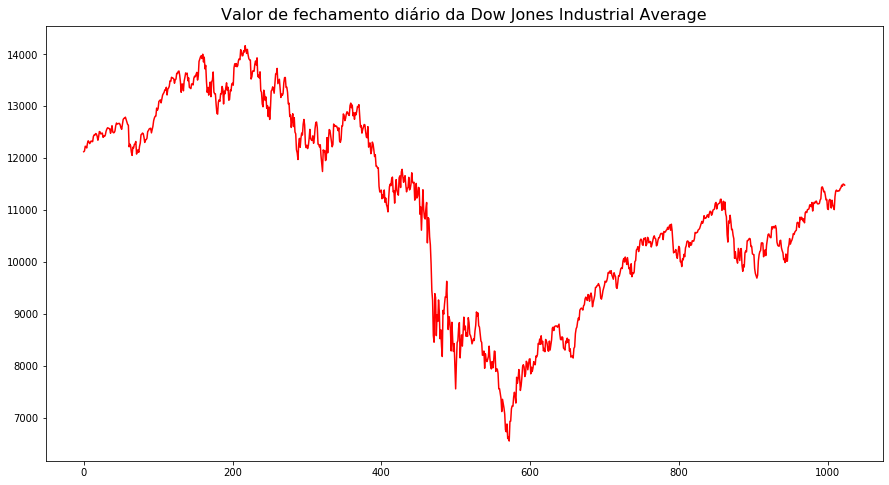

In [97]:
Sinal = loadtxt("dow.txt",float)

fig = plt.figure(figsize=(15,8))
plt.plot(Sinal,"r")
plt.title("Valor de fechamento diário da Dow Jones Industrial Average",fontsize=16)
plt.show()

A experiência agora será descartar parte dos coeficientes na transformada de Fourier e tentar retornar ao Sinal inicial.

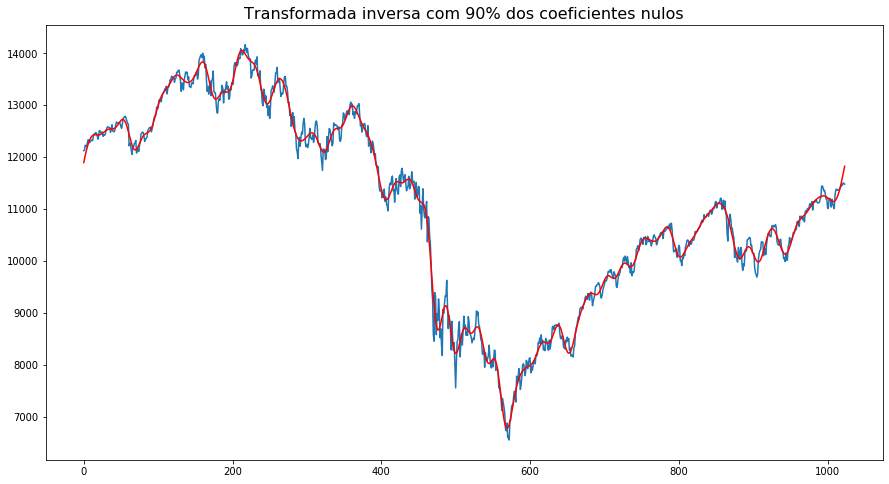

In [198]:
ck = rfft(Sinal)

for i in range(50,513):
    ck[i] = 0
yn = irfft(ck)

fig = plt.figure(figsize=(15,8))
plt.plot(Sinal)
plt.plot(yn,"r")
plt.title("Transformada inversa com 90% dos coeficientes nulos",fontsize=16)
plt.show()

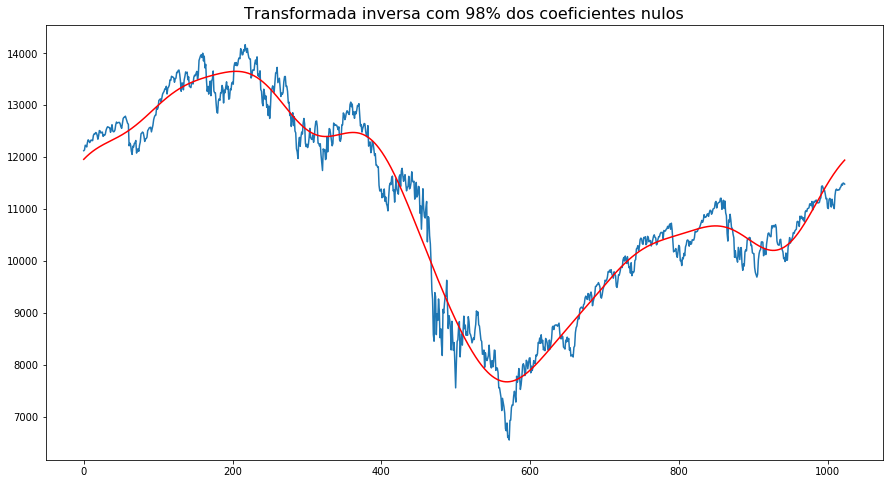

In [199]:

for i in range(9,513):
    ck[i] = 0
yn = irfft(ck)

fig = plt.figure(figsize=(15,8))
plt.plot(Sinal)
plt.plot(yn,"r")
plt.title("Transformada inversa com 98% dos coeficientes nulos",fontsize=16)
plt.show()

### Descartar parte dos coeficientes da transformada de Fourier implica em jogar fora parte das frequências que compõem o sinal original. Isso é feito por exemplo para armazenamento de dados, em que guardamos uma parte dos coeficientes, tal que seja uma quantidade suficiente para que possamos recuperar os dados originais sem que haja muita descaracterização. Por mais que essas frequências tenham coeficientes menores, isto é, são menos relevantes para caracterizar a função original, ainda assim elas devem, até certo ponto, ser consideradas no armazenamento. No gráfico em que deixamos 10% dos coeficientes houve uma boa reconstrução do sinal quando aplicamos a transformada inversa, porém para 2% a função foi "suavisada" demais e perdemos informações importantes a respeito das variações de preços do mercado.

### Questão 5

1
-1


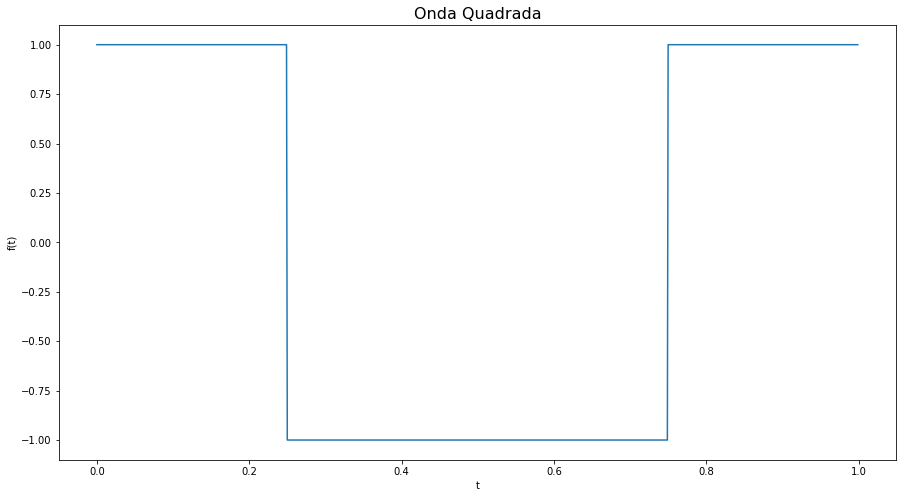

In [200]:
#fazendo a função f(t):

def f(t):
    b = (2*t//1)
    if (2*t-b)<0.5:
        a = b
    else:
        a=b+1
    if (a)%2 == 0:
        return 1
    else:
        return -1
print(f(2))
print(f(0.5))
V = []
T = []
for t in arange (0,1,0.001):
    T.append(t)
    V.append(f(t))
    
fig = plt.figure(figsize=(15,8))
plt.plot(T,V)
plt.title("Onda Quadrada",fontsize=16)
plt.ylabel("f(t)")
plt.xlabel("t")
plt.show()

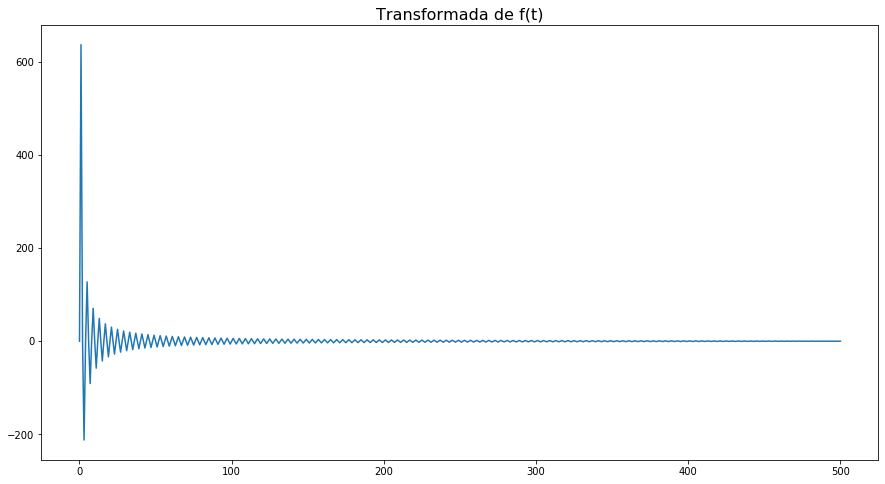

In [203]:
#calculando a transformada de Fourier:
ck = rfft(V)

fig = plt.figure(figsize=(15,8))
plt.plot(ck)
plt.title("Transformada de f(t)",fontsize=16)
plt.show()


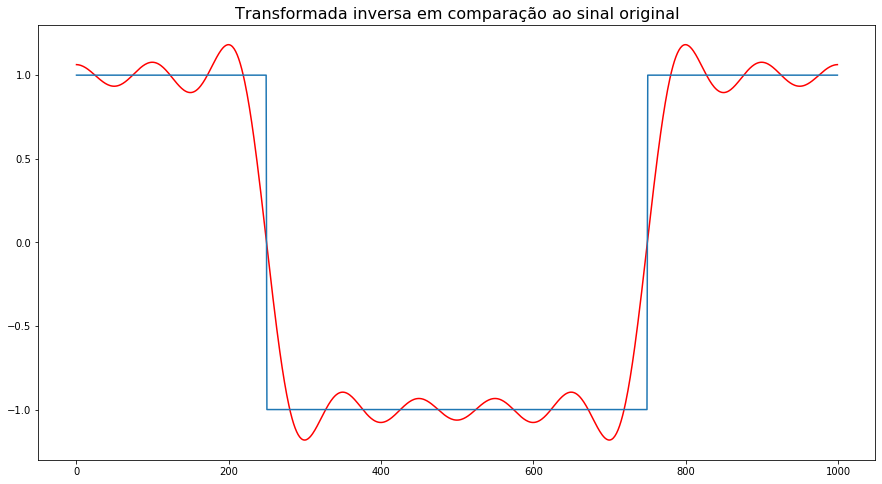

In [204]:
#alterando os coeficientes para 0:

for i in range(501):
    if i>9:
        ck[i]=0

yn = irfft(ck)

fig = plt.figure(figsize=(15,8))
plt.plot(yn,"r")
plt.plot(V)
plt.title("Transformada inversa em comparação ao sinal original",fontsize=16)
plt.show()

### uma onda perfeitamente quadrada é o tipo de aproximação por Série de Fourier mais comum, porém o mais complicado por ser uma onda pouquíssimo suave. Por isso, para uma boa aproximação por Série de Fourier é necessário uma quantidade muito maior de parcelas do somatório, ou seja, de frequências na composição do sinal. Quando descartamos boa parte dessas frequências, podemos ver nitidamente os artifícios da transformada inversa para recuperar o sinal usando uma composição de senos e cossenos para realizar a aproximação.

### Questão 6

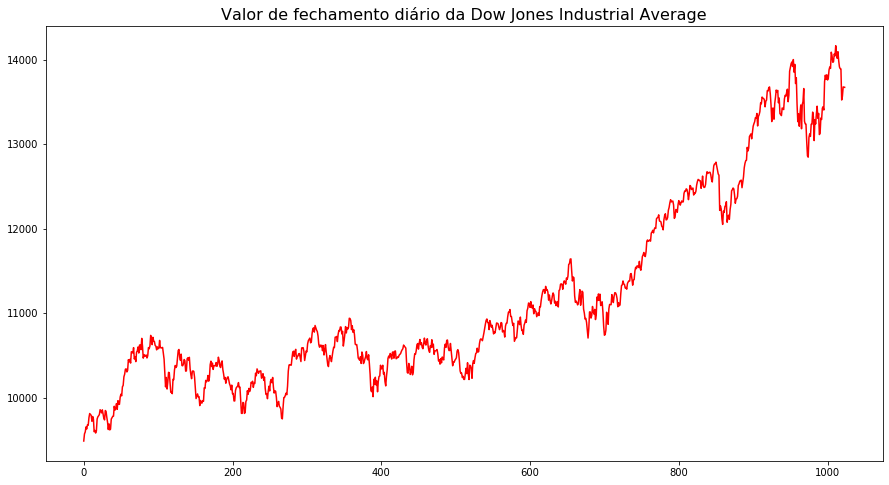

In [206]:
Sinal2 = loadtxt("dow2.txt",float)

fig = plt.figure(figsize=(15,8))
plt.plot(Sinal2,"r")
plt.title("Valor de fechamento diário da Dow Jones Industrial Average",fontsize=16)
plt.show()

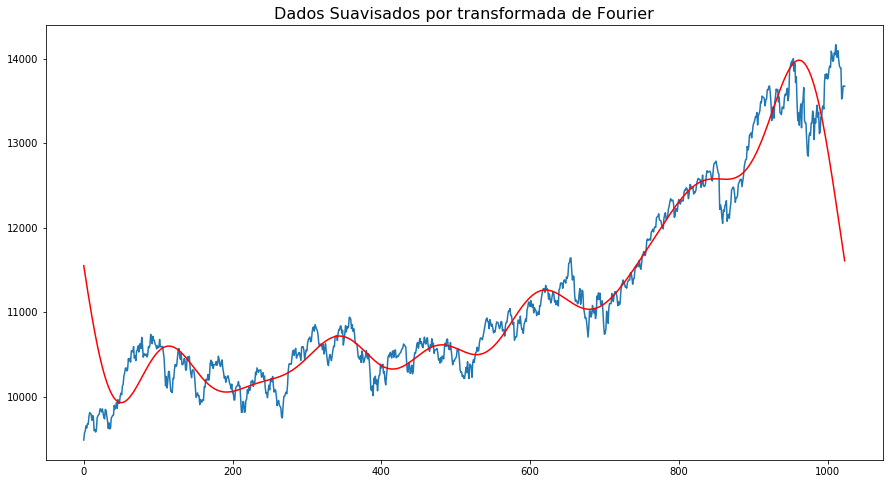

In [207]:
ck = rfft(Sinal2)
for i in range(9,513):
    ck[i] = 0
yn = irfft(ck)

fig = plt.figure(figsize=(15,8))
plt.plot(Sinal2)
plt.plot(yn,"r")
plt.title("Dados Suavisados por transformada de Fourier",fontsize=16)
plt.show()

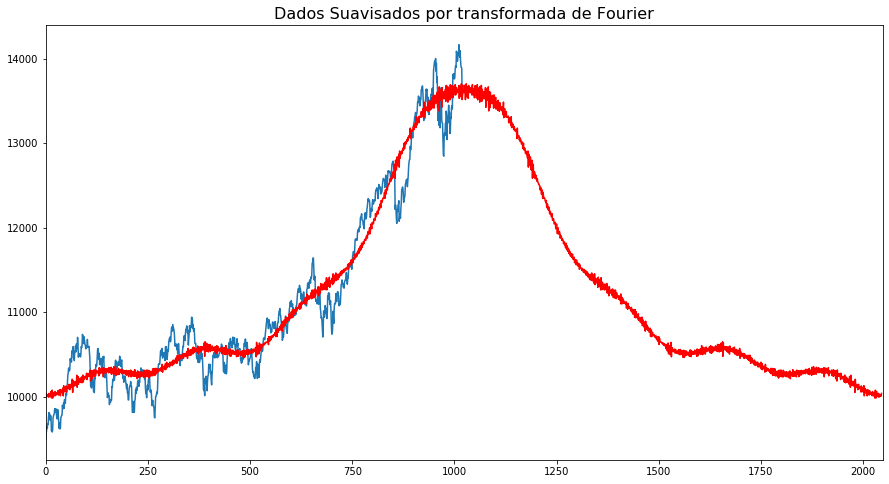

In [213]:
#agora vamos fazer o mesmo procedimento com a Transformada Cosseno de Fourier

from dcst import dct

ck = dct(Sinal2)
for i in range(9,513):
    ck[i] = 0
yn = irfft(ck)

fig = plt.figure(figsize=(15,8))
plt.plot(Sinal2)
plt.plot(yn,"r")
plt.xlim(0,2048)
plt.title("Dados Suavisados por transformada de Fourier",fontsize=16)
plt.show()

### Aqui podemos perceber as diferentes análises de dados de uma Transformada de Fourier para uma Transformada cosseno. A Transformada de Fourier vai partir da suposição de que o sinal em questão é periódico, portanto quando realizamos a transformada, descartamos algumas frequências e aplicamos a transformada inversa, os dados recuperados vão sempre tender a serem iguais no inicio e no fim. Isso pode ser desvantajoso quando temos dados que não retornam ao valor inicial, como no caso dessa crescente de preços do mercado. Uma alternativa é usar a Transformada cosseno, que não tem essa mesma exigência com seus dados, e na verdade faz um espelhamento da função para que ela se torne periódica.  